Complex networks rarely have a crip structure that shows whether tow nodes are unquestionably connected. The nodes are not always homogeneous, either. However, sometimes 2 items are similar.

# Understand Similarity
Similarity-based networks emerge from the similarity of one or more attributes of objectes represented by the network nodes. The type of objectes and the number of attributes are limited only by the creativity of researchers.

Any quantitative measure of similarity has 2 aspects: what to measure and how to measure. in case of similarity-based networks, the first addresses the choice of significant nodes attributes, and the second refers to transforming the attributes into distances. 

## Creating New Attributes
When it comes to similarity-based networks, the most frustrating is when you want to use node attributes to calculate similarity, but nodes have no attribute at all.

An event network is a similarity based network where nodes represent formal or informal social events, and edges depict their similarities. The nodes in an event network are usually not hard to identify, but similarities could be subtle. 

Suppose your goal is to transform the network of women and events they get involved in into a network of events. Such transformations are called **projection**

The identities of women incident to each event are treated as the event's attributes. After the synthetic graph of the Southern women and the attended events G1 are obtained, you should separate the nodes into the "women" and "events" subsets. In the Davis network, all event labels start with the capital letter E. All network neighbors of an event node must be "women nodes", whose labels are accessible as the keys of the dictionary of neighbors.

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial.distance as dist
import numpy as np
import scipy.stats as stats 

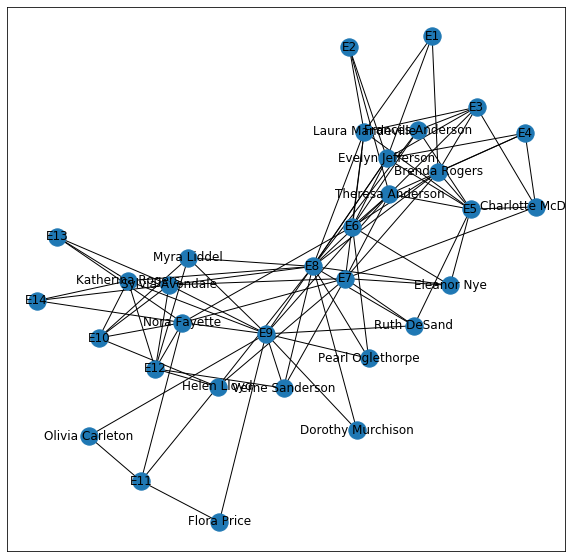

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
G = nx.davis_southern_women_graph()
nx.draw_networkx(G, ax = ax, with_labels = True)

In [111]:
# extract adjacency matric from the graph
attend_list = []
for node in G.nodes():
    if not node.startswith('E'):
        B = nx.ego_graph(G, node)
        df = nx.to_pandas_adjacency(B)
        df.drop(node, axis = 1, inplace = True)
        section = pd.DataFrame(df.loc[node])
        attend_list.append(section)
df0 = pd.concat(attend_list,axis = 1).fillna(0).astype(int)
df0

,Laura Mandeville,Theresa Anderson,Brenda Rogers,Charlotte McDowd,Frances Anderson,Pearl Oglethorpe,Ruth DeSand,Verne Sanderson,Myra Liddel,Katherina Rogers,Sylvia Avondale,Nora Fayette,Helen Lloyd,Dorothy Murchison,Olivia Carleton,Flora Price
E5,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
E1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
E3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
E6,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0
E8,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0
E2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E7,1,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0
E4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
E9,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1
E12,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0


## Binarizing Existing Attributes
If the similarity measure you plan to use works only with binary attributes, you must first dichotomize (binarize) the attributes that don't fit. For example, features that have an attribute value over the mean value is assigned 1, and otherwise 0.

# Choose the Right Distance
All similarity measure are numeric, so you must quantify any qualitative attributes before calculating similarities. Once quantified, the attributes can be thought of as coordinates of the object in a multidimensional coordinate space, where the number of dimensions equals the number of attributes. Let's have a look at some typical distance and similarity measures.

## 1. Hamming Distance

The **Hamming Distance** between 2 objects is <mark>the number of features that are present in one object, but not in the other, divided by the maximal number of features.</mark>

The similarity, conversely, is <mark>the number of features jointly present or absent in both objects, and again, divided by the maximal number of features.</mark>

The Hamming distance definition can be extended to include categorical attributes. In this case, <mark>the similarity between 2 objects is the number of attributes that are equal in both objects.</mark> The attributes do not even have to be quantitative. The Hamming distance works best when future network nodes have many almost equally significant binary attributes whose presence/absence is roughly equally prbable.

Consider the following table:

|Vegetable| Shape| Color| Starchy|
|:-|:-|:-|:-|
|Carrot |Conic| Orange |False|
|Corn| Conic| Yellowish |True|
|Potato |Round|Yellowish| True|
|Turnip| Round |Yellowish |False|

In [134]:
# Calculate the Hamming distance of the above table
data = {
"carrot" : {"shape": "conic", "color": "orange", "starchy": False},
"corn" : {"shape": "conic", "color": "yellowish", "starchy": True},
"potato" : {"shape": "round", "color": "yellowish", "starchy": True},
"turnip" : {"shape": "round", "color": "yellowish", "starchy": False}
}
# the method set.union return the union of a series of sets as a new set
atts = set.union(*[set(x.keys()) for x in data.values()])
Sim_list = [[sum(data[i][att] == data[j][att] for att in atts)/len(atts) for i in data] for j in data]
Sim_list

[[1.0, 0.3333333333333333, 0.0, 0.3333333333333333],
 [0.3333333333333333, 1.0, 0.6666666666666666, 0.3333333333333333],
 [0.0, 0.6666666666666666, 1.0, 0.6666666666666666],
 [0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0]]

In [142]:
# Python offers another way to calculate the Hamming distance: by calling the namesake function hamming() from 
# scipy.spatial.distance.

Dis_list = [[dist.hamming(list(data[i].values()), list(data[j].values())) for i in data] for j in data]
Dis_df = pd.DataFrame(Dis_list, columns = data, index = data)
Dis_df

,carrot,corn,potato,turnip
carrot,0.000000,0.666667,1.000000,0.666667
corn,0.666667,0.000000,0.333333,0.666667
potato,1.000000,0.333333,0.000000,0.333333
turnip,0.666667,0.666667,0.333333,0.000000


## 2. Manhattan Distance

The Manhattan distance is an extension of the Hamming distance for continuous attributes. It is defined mathmatically as d = $|\Delta x_1| + |\Delta x_2| + ... + |\Delta x_n|$, where d is the distance between 2 nodes A and B, and $\Delta x_1 = x_{A1} - x_{B1}$ is the difference between the values of their ith attribute. 

Scipy provides function dist.cityblock(u,v) that takes 2 attribute vectors u and v and returns the Manhattan distance between them. One major problem with the function dist.cityblock() is that it assumes that all attributes are comparable in range. A workaround is to normalize each attribute by subtracting the smallest value and dividing by the range.

To observe the Manhattan distance in action, the humans' heights and weights from the SOCR Dataset is taken as an example:

|Height(inches) | Height(pounds) 
|:-|:-|
|65.78|112.99|
|71.52|136.49|
|69.40|153.03|
|68.22|142.34|
|67.79|144.30|

In [29]:
hwdata = [[65.78, 112.99],
        [71.52, 136.49],
        [69.40, 153.03],
        [68.22, 142.34],
        [67.79, 144.30]]
hw_array = np.array(hwdata)
# weights and heights are not comparable. thus, they should be normalized
hw_norm = (hw_array - np.min(hw_array, axis = 0))/(np.max(hw_array, axis = 0) - np.min(hw_array, axis = 0))

man_sim = [[dist.cityblock(i,j) for j in hw_norm] for i in hw_norm]
man_array = np.array(man_sim)
man_array

array([[0.        , 1.58691309, 1.63066202, 1.15810409, 1.13214225],
       [1.58691309, 0.        , 0.78242489, 0.72101679, 0.84488073],
       [1.63066202, 0.78242489, 0.        , 0.47255793, 0.49851977],
       [1.15810409, 0.72101679, 0.47255793, 0.        , 0.12386394],
       [1.13214225, 0.84488073, 0.49851977, 0.12386394, 0.        ]])

## 3. Cosine Distance

The previous distance measure treat nodes with N attributes as points in an N-dimensional space. Sometiems, it makes sense to treat attributes as directions - "lengthless vectors". The cosine distance empasized the similarity of shapes, spikes and other patterns, rather than actual values. 

Call the Scipy function cosine(u,v) to simplify your code and make it more abstract. 

In [52]:
winds = {
"Anchorage": (58,60,132,552,291,180,88,62,58,36,20,4,3,16,119,81),
"Boston": (93,104,106,101,80,82,82,110,216,292,281,205,246,204,159,86),
"Chicago": (115,195,122,109,86,120,157,210,273,196,139,101,113,106,
107,115),
"San Francisco": (35,67,156,616,1208,894,268,67,2,0,0,0,2,9,22,35)
}

cos_sim = {i: [1 - dist.cosine(winds[i], winds[j]) for j in winds.keys()] for i in winds.keys()}
cos_df = pd.DataFrame(cos_sim, index = winds.keys())
cos_df

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,0.408479,0.523189,0.791712
Boston,0.408479,1.000000,0.884222,0.264567
Chicago,0.523189,0.884222,1.000000,0.381017
San Francisco,0.791712,0.264567,0.381017,1.000000


## 4. Pearson Distance

One of the complications with the cosine similarity is that it is noe invariant to shifts: it fails to detect small variations of attributes. In other words, the cosine similarity formula overestimates similarity, which is not necessarily disirable.

The pearson correlation is calculated using the same formula as for the cosine similarity, except that the attribute vectors are first translated by subtracting the mean: s = $ (x_A - x_{Amean})*(x_B - x_{Bmean})/(||x_A - x_{Amean}||*||x_B - x_{Bmean}|| ) $

Scipy provides the function stat.pearsonr(), which calculates both the correlation and its p-value as a tuple

In [56]:
wind_pearson = pd.DataFrame({i:[stats.pearsonr(winds[i], winds[j])[0] for j in winds] for i in winds}, index = winds.keys())
wind_pearson

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,-0.482339,-0.288015,0.704106
Boston,-0.482339,1.000000,0.234174,-0.524232
Chicago,-0.288015,0.234174,1.000000,-0.352705
San Francisco,0.704106,-0.524232,-0.352705,1.000000


In [62]:
#  a more efficient solution is to convert the attribute dictionary into a dataframe and use the built-in method corr()
pd.DataFrame(winds).corr()

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,-0.482339,-0.288015,0.704106
Boston,-0.482339,1.000000,0.234174,-0.524232
Chicago,-0.288015,0.234174,1.000000,-0.352705
San Francisco,0.704106,-0.524232,-0.352705,1.000000
